In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.pyplot as plt
from tslearn.metrics import dtw_path, cdist_dtw
import time
from sklearn.metrics import davies_bouldin_score

In [16]:
# Load the CSV file for our particular month (December 2017) for all California households 
data = pd.read_csv('Dec.csv', encoding = "ISO-8859-1")

# Ensure the 'DateTime' column is a datetime type
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Select the first x households based on unique identifiers (We are trying out 50 households first, because running the analysis for all households
# is far too computationally expensive for a laptop) This filtering functionality can be removed once we have the computation power to run for all
# households in our full dataset
sample_n = 90

first_x_households = data['Identifier'].unique()[:sample_n]

# Filter the data for these households and for the date December 21. We are just trying one day for our timeseries data, 12/21 Winter Soltice as our 
# representative winter day, since even for just sampling x housholds, running analysis on month-long timeseries is too computationally expensive. 
# This date filtering functionality can be removed once we have the computation power to run analysis for all days in the month.
filtered_data = data[data['Identifier'].isin(first_x_households)]
filtered_data = filtered_data[filtered_data['DateTime'].dt.date == pd.to_datetime('2017-12-21').date()]

# Handling missing data - forward fill
filtered_data.fillna(method='ffill', inplace=True)

# Initialize a list to hold all formatted time series. This will be our collection of timeseries for all households that serve as the "data points" 
# that we are clustering based on "shape" and "distance" similarity
all_households_timeseries = []
valid_households = []

# Iterate through each household
for identifier in first_x_households:
    
    # Extract the household's time series data
    household_data = filtered_data[filtered_data['Identifier'] == identifier].copy()
    
    # Calculate the total heating as the maximum activity at any given interval. This is essentially finding for each 5-minute interval timestamp the
    # total seconds duration that "heating activity" was occuring for, regardless of whether from a furnace, heat pump, or combination of the two. To
    # account for situations where two heating systems are working at the same 5-minute interval, we simply just use the highest time duration between
    # both systems ('auxHeat' vs 'compHeat'). We then get a single timeseries showing across the day-long recording period, the timeduration of heating
    # activity at each 5-minute DateTime interval.
    household_data['TotalHeating'] = household_data[['auxHeat1', 'auxHeat2', 'auxHeat3', 'compHeat1', 'compHeat2']].max(axis=1)
    
    # # Add the total heating activity to our collection list of timeseries for all households to be used as the data source for clustering
    # all_households_timeseries.append(household_data['TotalHeating'].values)

    # Check if total heating is greater than zero for the day
    if household_data['TotalHeating'].sum() > 0:
        all_households_timeseries.append(household_data['TotalHeating'].values)
        valid_households.append(identifier)

    # Check if we have enough valid households
    if len(valid_households) >= sample_n:
        break

# Convert all time series to a time series dataset
X = to_time_series_dataset(all_households_timeseries)

# Normalize the data
X_normalized = TimeSeriesScalerMeanVariance().fit_transform(X)

# Clustering (set number of clusters)
n_clusters = 3  # This can be adjusted based on our understanding of the data (for now assuming 3 clusters: furnace, heat pump, or dual fuel system)

#define the clustering algorithm with dynamic time warping "distance" as the clustering metric and run
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True)
y_pred = model.fit_predict(X_normalized)

# Assign y_pred to contain the cluster assignment for each household, producing an array where each sample household gets assigned a '0', '1', or '2' 
# to indicate which of the 3 clusters it was assigned to
print("")
print("Cluster assignments for each household:")
y_pred

C:\Users\haako\AppData\Local\Temp\ipykernel_29868\1893461039.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filtered_data.fillna(method='ffill', inplace=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished


93.418 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished


65.800 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished


64.073 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished


62.114 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished


61.070 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished


60.749 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished


60.749 --> 

Cluster assignments for each household:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished


array([0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1,
       2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2], dtype=int64)

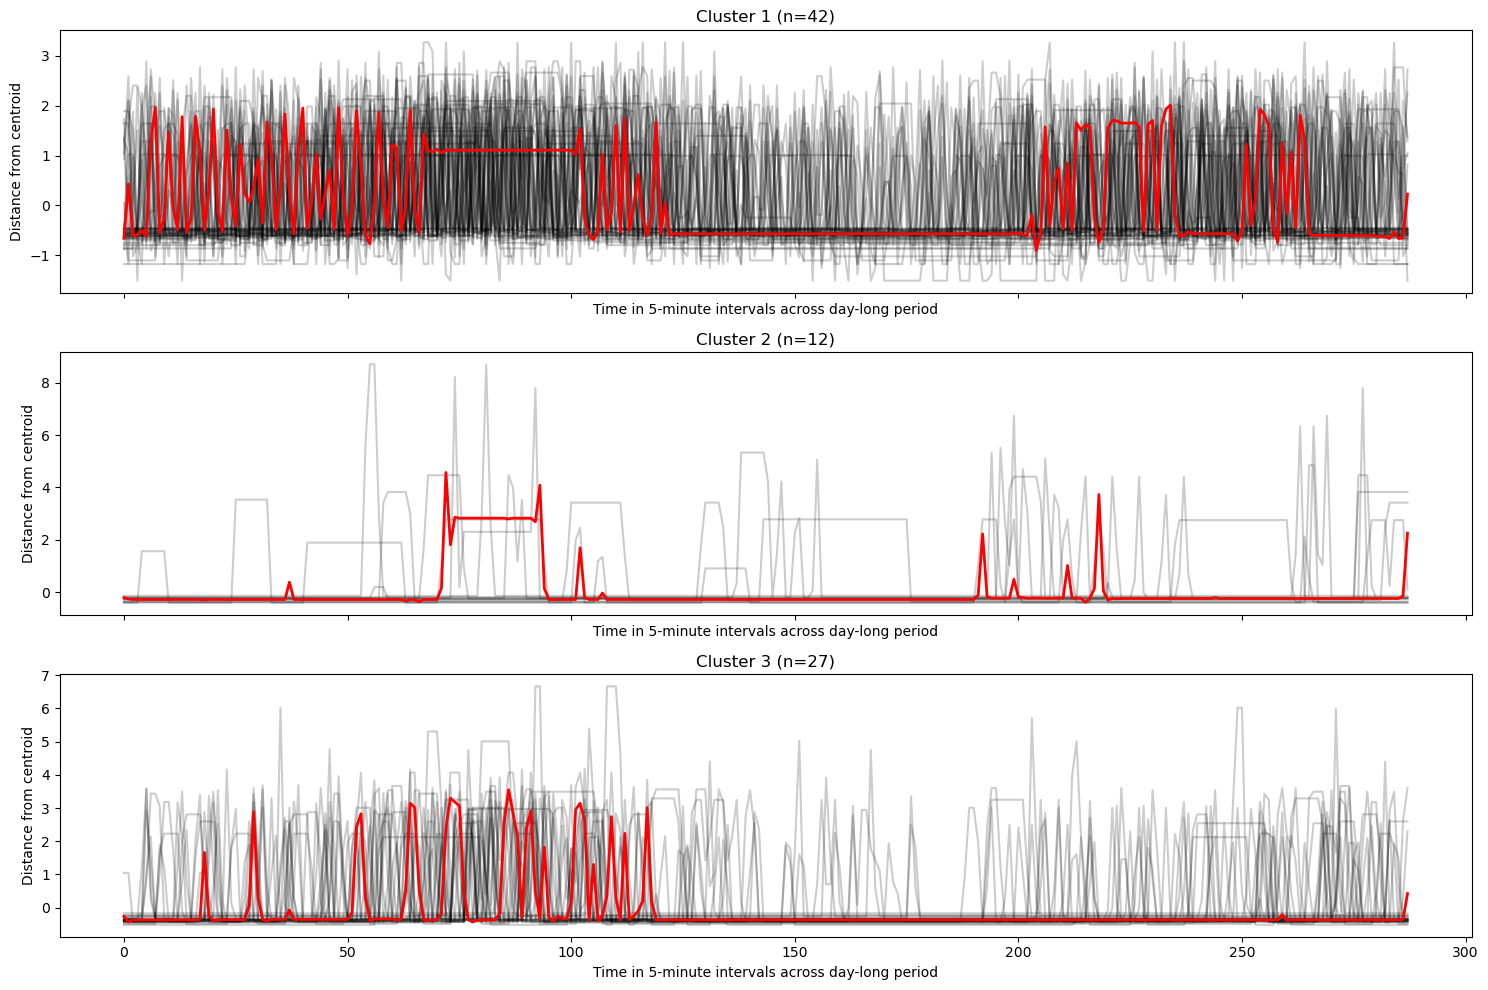

In [17]:
# Now we plot our 3 clusters to show how heat activity timeseries for each household was clustered, with DateTime 5-minute intervals 
# as the x-axis and heating activity time duration in seconds as the y-axis, as well indicating the number of households assigned to each cluster

# Get the centroids of the clusters
centroids = model.cluster_centers_

# Number of plots should be equal to our defined number of clusters
n_clusters = centroids.shape[0]

# Create a figure with subplots - one for each cluster
fig, axs = plt.subplots(n_clusters, 1, figsize=(15, 10), sharex=True)

# Ensure axs is an array even when n_clusters is 1
if n_clusters == 1:
    axs = [axs]

# Loop through each cluster
for cluster_idx in range(n_clusters):
    # Find which time series belong to this cluster
    members = (y_pred == cluster_idx)
    
    # Plot each member of the cluster
    for x in X_normalized[members]:
        axs[cluster_idx].plot(x.ravel(), "k-", alpha=0.2)
    
    # Overlay the cluster centroid
    axs[cluster_idx].plot(centroids[cluster_idx].ravel(), "r-", linewidth=2)

    #Set plot title
    num_households = members.sum()
    axs[cluster_idx].set_title(f"Cluster {cluster_idx + 1} (n={num_households})")

    # Set axis labels
    axs[cluster_idx].set_xlabel("Time in 5-minute intervals across day-long period")
    axs[cluster_idx].set_ylabel("Distance from centroid")

plt.tight_layout()
plt.savefig('DTW_plot.jpg', dpi=300)
plt.show()

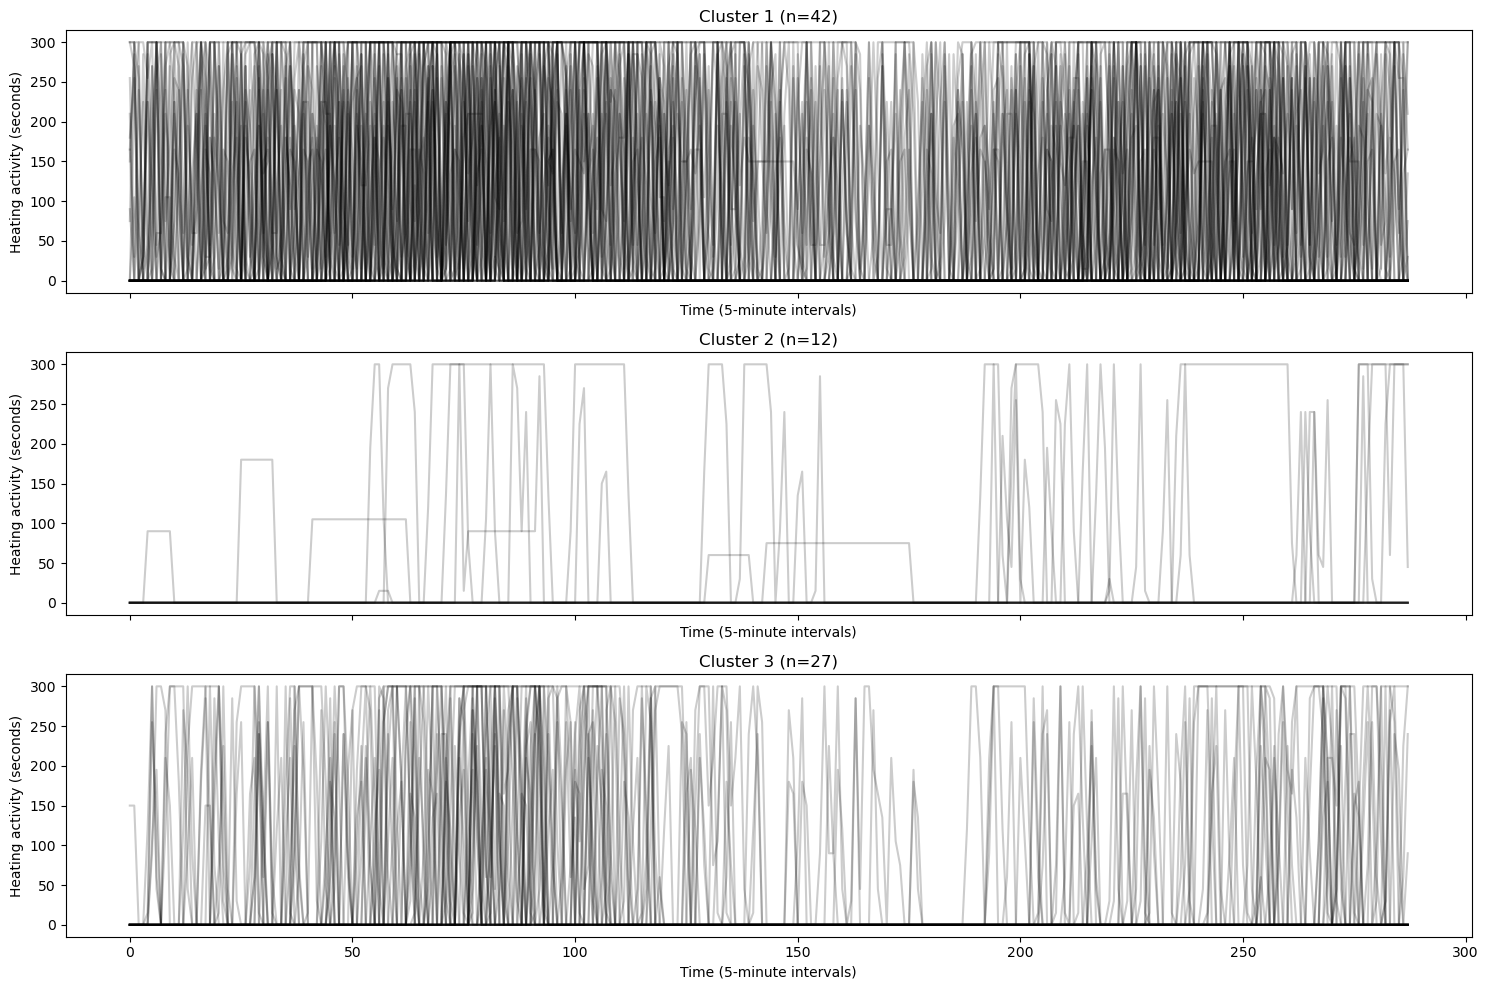

In [18]:
# Now we plot the raw timeseries data for each household on the original 0-300 seconds time duration scale, un-normalized 

# Create a figure with subplots - one for each cluster
fig, axs = plt.subplots(n_clusters, 1, figsize=(15, 10), sharex=True)

# Ensure axs is an array even when n_clusters is 1
if n_clusters == 1:
    axs = [axs]

# Loop through each cluster for plotting
for cluster_idx in range(n_clusters):
    # Find which time series belong to this cluster
    members = (y_pred == cluster_idx)
    num_households = members.sum()

    # Plot each member of the cluster using the original data
    for idx in np.where(members)[0]:  # np.where(members) gives indices of true elements
        axs[cluster_idx].plot(X[idx], "k-", alpha=0.2)

    #Set title
    axs[cluster_idx].set_title(f"Cluster {cluster_idx + 1} (n={num_households})")
    
    # Set axis labels
    axs[cluster_idx].set_xlabel("Time (5-minute intervals)")
    axs[cluster_idx].set_ylabel("Heating activity (seconds)")

plt.tight_layout()
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:    0.0s finished


145.607 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:    0.1s finished


72.743 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:    0.1s finished


72.704 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:    0.1s finished


72.704 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished


90.788 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.1s finished


69.177 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.1s finished


67.849 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.1s finished


67.849 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    0.1s finished


85.327 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    0.1s finished


62.935 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    0.1s finished


62.029 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    0.1s finished


61.726 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    0.1s finished


61.726 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

71.381 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    0.2s finished


53.865 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


53.690 --> 

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


53.690 --> 


[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

66.604 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 486 out of 486 | elapsed:    0.2s finished


51.981 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 486 out of 486 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


51.464 --> 

[Parallel(n_jobs=1)]: Done 486 out of 486 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


51.464 --> 


[Parallel(n_jobs=1)]: Done 486 out of 486 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

66.883 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 567 out of 567 | elapsed:    0.3s finished


50.455 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 567 out of 567 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


49.995 --> 

[Parallel(n_jobs=1)]: Done 567 out of 567 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


49.995 --> 


[Parallel(n_jobs=1)]: Done 567 out of 567 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Us

57.478 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 648 out of 648 | elapsed:    0.3s finished


46.147 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 648 out of 648 | elapsed:    0.3s finished


45.299 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 648 out of 648 | elapsed:    0.3s finished


44.972 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 648 out of 648 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


44.761 --> 

[Parallel(n_jobs=1)]: Done 648 out of 648 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


44.761 --> 


[Parallel(n_jobs=1)]: Done 648 out of 648 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Us

56.939 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 729 out of 729 | elapsed:    0.4s finished


44.758 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 729 out of 729 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


44.472 --> 

[Parallel(n_jobs=1)]: Done 729 out of 729 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


44.472 --> 


[Parallel(n_jobs=1)]: Done 729 out of 729 | elapsed:    0.4s finished


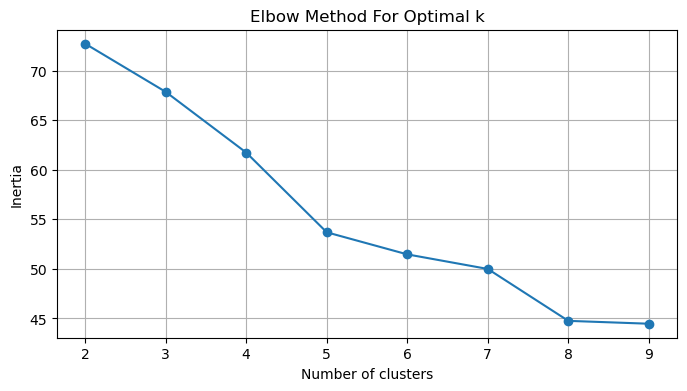

In [19]:
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans

# Array to store the inertias
inertia = []
# Range of k to try
k_range = range(2, 10)

for k in k_range:
    try:
        # Create a TimeSeriesKMeans instance with k clusters
        kmeans = TimeSeriesKMeans(n_clusters=k, metric="dtw", verbose=True, max_iter=10)
        # Fit the model to the normalized data
        kmeans.fit(X_normalized)
        # Append the inertia to the list
        inertia.append(kmeans.inertia_)
    except Exception as e:
        print(f"Failed at k={k} with error: {e}")
        inertia.append(None)  # Append None or you could use the last known good inertia

# Filter out None values if any failures occurred
filtered_k = [k for k, i in zip(k_range, inertia) if i is not None]
filtered_inertia = [i for i in inertia if i is not None]

# Plotting the elbow graph
plt.figure(figsize=(8, 4))
plt.plot(filtered_k, filtered_inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

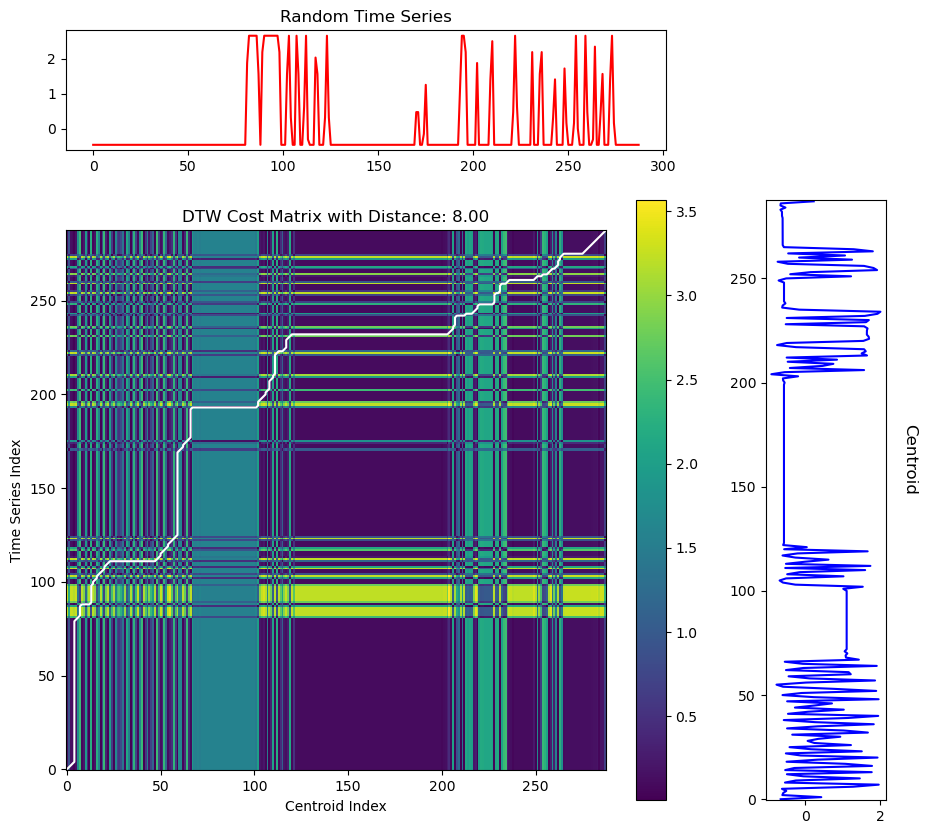

In [20]:
# This will generate a cost matrix plot that compares a random time series from our data set to one of the defined clusters based on the DTW distance 
# between. The Each time you run the code it will a different random time series from the data set to another (or perhaps the same) centroid. Perhaps 
# try generating a few of these plots for comparison

# Assuming model is your trained KMeans model and X_normalized is your normalized dataset
# Select a random time series index
np.random.seed(int(time.time()))
random_ts_index = np.random.choice([i for i in range(X_normalized.shape[0]) if X_normalized[i].max() > 0])

# Select a random centroid
# This could also be a specific one if you're interested in a particular cluster
random_centroid_index = np.random.randint(0, model.n_clusters)

# Extract the time series and the centroid
ts = X_normalized[random_ts_index]
centroid = model.cluster_centers_[random_centroid_index]

# Compute the full distance matrix for visualization
dist_matrix = cdist_dtw(ts, centroid)

# Calculate DTW path and distance
path, dist = dtw_path(ts, centroid)

# Plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6])  # main axes
im = ax.imshow(dist_matrix, origin='lower', cmap='viridis', interpolation='nearest')

# Plot the path
path = np.array(path)
ax.plot(path[:, 1], path[:, 0], 'w-')  # reverse the order for x, y for proper alignment

# Create additional axes for the side plots
ax_x = fig.add_axes([0.1, 0.75, 0.6, 0.12])  # for ts
ax_y = fig.add_axes([0.8, 0.1, 0.12, 0.6])  # for centroid

# Plot ts and centroid on the additional axes
ax_x.plot(ts.ravel(), "r-")
ax_x.set_title("Random Time Series") 
# ax_x.set_xticks([])  # Remove x-ticks
# ax_x.set_yticks([])  # Remove y-ticks

ax_y.plot(centroid.ravel(), range(len(centroid)), "b-")
ax_y.set_title("Centroid", rotation=270, y=0.5, x=1.2)
# ax_y.set_xticks([])  # Remove x-ticks
# ax_y.set_yticks([])  # Remove y-ticks
ax_y.set_ylim(ax.get_ylim())  # Align y-axis with main plot

# Labels and title
ax.set_xlabel('Centroid Index')
ax.set_ylabel('Time Series Index')
ax.set_title(f'DTW Cost Matrix with Distance: {dist:.2f}')

# Colorbar
fig.colorbar(im, ax=ax, location='right', fraction=0.05)
fig.savefig('DTW_plot2.jpg', dpi=300)
plt.show()

In [21]:
import numpy as np

# Find number of on/off switches for each household, defined as a transition from a zero to non-zero value, or a transition from a non-zero to a
# zero value. We find the counts of these on/off switch events for each household, as non-timeseries values, and then run kmeans on everything to get
# the frequency of on/off switch events as clusters, perhaps showing a distinction between heat pumps and non-heat pumps

# Assuming X is your dataset where each row is a time series
transition_counts = []

for ts in X:
    # Count transitions: We use np.diff to find changes, and count where changes are non-zero (either from 0 to some value or vice versa)
    transitions = np.diff((ts.ravel() != 0).astype(int))  # Convert time series to binary where 0 is off, non-zero is on
    transition_count = np.count_nonzero(transitions)  # Count the number of changes
    transition_counts.append(transition_count)

# Now transition_counts contains the number of transitions for each time series
transition_counts = np.array(transition_counts)

# If needed, convert this list into a suitable format for further analysis or clustering
X_transitions = transition_counts.reshape(-1, 1)  # Reshape for use in sklearn if necessary

# Example: Clustering based on transition counts
from sklearn.cluster import KMeans

# Assume you decide on some number of clusters, let's say 2 for simplicity
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(X_transitions)

# labels now contains the cluster assignments based on the transition counts
labels

C:\Users\haako\ny\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\haako\ny\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1,
       0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])

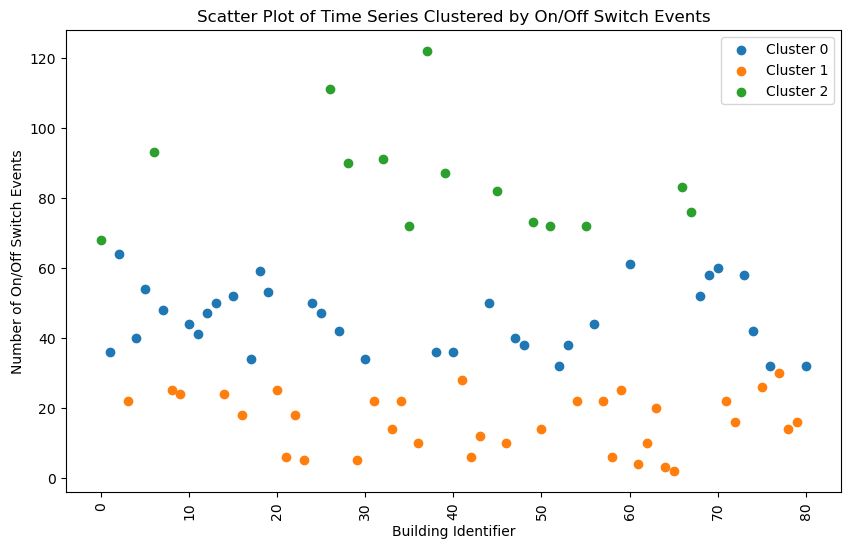

In [22]:
# Plot of on/off switch event clusters by household ID, color-coded by cluster

identifiers = np.arange(X.shape[0])  # Creating an array of indices from 0 to number of time series - 1

plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    cluster_members = labels == i
    # Plotting using indices as x-values and transition counts as y-values
    plt.scatter(identifiers[cluster_members], transition_counts[cluster_members], label=f'Cluster {i}')

plt.title('Scatter Plot of Time Series Clustered by On/Off Switch Events')
plt.xlabel('Building Identifier')
plt.ylabel('Number of On/Off Switch Events')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for clarity if needed
plt.show()

In [23]:
# Calculate for each household the mean time between cycles (mean time between on/off switch events)
# Cluster these these mean time values

import numpy as np
from sklearn.cluster import KMeans

if X.size == 0:
    raise ValueError("Input dataset X is empty.")

average_durations = []
for ts in X:
    transitions = np.diff((ts.ravel() != 0).astype(int))
    transition_indices = np.where(transitions != 0)[0] + 1  # Adjust for diff offset
    
    if len(transition_indices) > 1:
        durations = np.diff(transition_indices)
        average_duration = np.mean(durations)
        average_durations.append(average_duration)
    elif len(transition_indices) == 1:
        # Handle case with only one transition
        average_durations.append(np.nan)  # Could assign some default or max duration
    else:
        # No transitions found
        average_durations.append(np.nan)

average_durations = np.array(average_durations)
if np.isnan(average_durations).all():
    raise ValueError("No valid transition durations were computed from the data.")

# Replace NaNs with a large number or handle them appropriately
max_duration = np.nanmax(average_durations) if np.isnan(average_durations).any() else 0
average_durations = np.nan_to_num(average_durations, nan=max_duration + 1)

# Ensure the array is suitable for clustering
if average_durations.size == 0:
    raise ValueError("No valid average durations available for clustering.")

X_durations = average_durations.reshape(-1, 1)  # Reshape for KMeans

# Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(X_durations)

# Now labels contains the cluster assignments
print(labels)

C:\Users\haako\ny\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\haako\ny\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


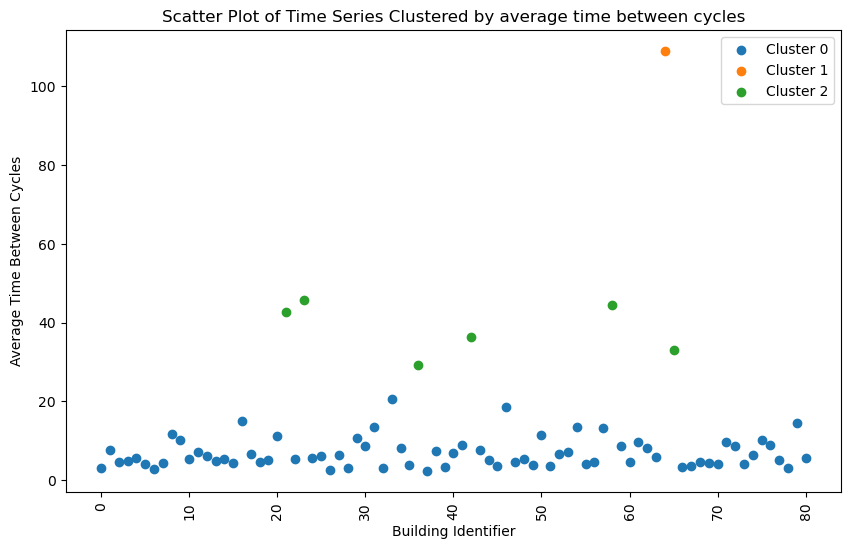

In [24]:
# Plot clusters of mean time between cycles across each household ID, color-coded by cluster

identifiers = np.arange(X.shape[0])  # Creating an array of indices from 0 to number of time series - 1

plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    cluster_members = labels == i
    # Plotting using indices as x-values and transition counts as y-values
    plt.scatter(identifiers[cluster_members], average_durations[cluster_members], label=f'Cluster {i}')

plt.title('Scatter Plot of Time Series Clustered by average time between cycles')
plt.xlabel('Building Identifier')
plt.ylabel('Average Time Between Cycles')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for clarity if needed
# plt.xticks(np.arange(X.shape[0]), rotation=90)
plt.show()

In [26]:
ids = filtered_data['Identifier'].unique()
ids_list = ids.tolist()

print(len(ids_list))
print(len(y_pred))

# Create a DataFrame from cluster assignments
cluster_df = pd.DataFrame({
    'Identifier': ids_list,
    'Cluster': y_pred
})

# Calculate percentage of households in each cluster
cluster_percentages = cluster_df['Cluster'].value_counts(normalize=True) * 100

print("Percentage of households in each cluster:")
print(cluster_percentages)

90
81


ValueError: All arrays must be of the same length

In [109]:
# Load metadata
metadata = pd.read_csv('C:/Users/alisj/Downloads/CA.csv')

# Just use households for our filtered sample dataset
sampled_metadata = metadata[metadata['Identifier'].isin(first_x_households)]

# Ensure there are no duplicated columns before merging
if 'Has a Heat Pump' in cluster_df.columns:
    cluster_df.drop('Has a Heat Pump', axis=1, inplace=True)

# Merge with cluster assignments
cluster_df = cluster_df.merge(metadata[['Identifier', 'Has a Heat Pump']], on='Identifier', how='left')

# Check the first few entries of the resulting DataFrame
print(cluster_df.head())# Load metadata

# Proportion of heat pumps in the whole dataset
overall_heat_pump_proportion = sampled_metadata['Has a Heat Pump'].value_counts(normalize=True).get(True, 0) * 100

# User specifies the cluster they believe to be the heat pump cluster
heat_pump_cluster = 1  # Change this number as needed based on your analysis

# Check if the selected cluster exists in the data
if heat_pump_cluster in cluster_df['Cluster'].unique():
    # Calculate the proportion of heat pumps in the specified cluster
    cluster_specific_proportion = cluster_df[cluster_df['Cluster'] == heat_pump_cluster]['Has a Heat Pump'].value_counts(normalize=True).get(True, 0) * 100

    # Print overall proportion of heat pumps and for the specified cluster
    print(f"Overall proportion of heat pumps: {overall_heat_pump_proportion:.2f}%")
    print(f"Proportion of heat pumps in Cluster {heat_pump_cluster}: {cluster_specific_proportion:.2f}%")
else:
    # Inform the user that the specified cluster does not exist
    print(f"There is no cluster {heat_pump_cluster}. Please choose a valid cluster number.")

                                 Identifier  Cluster  Has a Heat Pump
0  e5434937229322b1ec7f633956ff572b16226d88        0            False
1  d436c03f51782f404147e1a02ea82399d13db0b0        0            False
2  d003008c80a727fac6313607c7cf7b85cfbbf125        1            False
3  47df226423fcfbfa9514a155cffdbf620e8e2b41        0            False
4  edb659cf1efb39ed23d9a0b7a5b73ec7598007ee        2            False
Overall proportion of heat pumps: 6.00%
Proportion of heat pumps in Cluster 1: 14.29%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


140.390 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


72.789 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


72.789 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


99.952 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


56.831 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


56.831 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


81.883 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


56.161 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


53.723 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


51.748 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


50.805 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


50.805 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

72.591 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished


51.549 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished


49.364 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished


48.747 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished


47.790 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished


47.790 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

65.593 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


47.281 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


45.861 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


44.837 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


44.837 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

59.757 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.1s finished


43.398 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.1s finished


42.505 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.1s finished


41.482 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.1s finished


41.482 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

52.112 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


40.419 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


39.667 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished


38.748 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished


38.358 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


37.949 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished


37.487 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


37.371 --> 

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished


37.371 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

48.040 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


35.576 --> 

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


35.576 --> 


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    0.2s finished


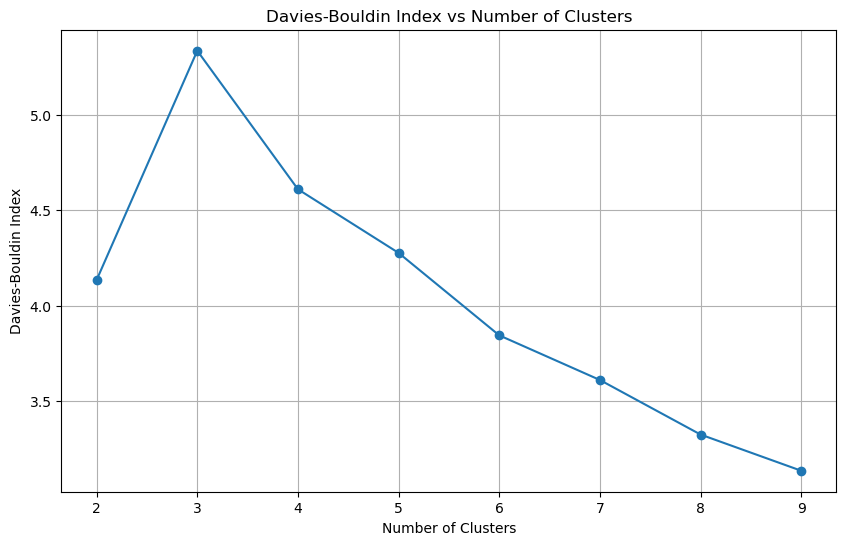

In [110]:
from sklearn.metrics import davies_bouldin_score
from tslearn.clustering import TimeSeriesKMeans

# Assuming 'X_normalized' is your normalized dataset
range_n_clusters = list(range(2, 10))  # Example range of cluster numbers
dbi_scores = []

for n_clusters in range_n_clusters:
    kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, random_state=10)
    cluster_labels = kmeans.fit_predict(X_normalized)
    dbi = davies_bouldin_score(X_normalized.reshape(X_normalized.shape[0], -1), cluster_labels)
    dbi_scores.append(dbi)

# Plotting Davies-Bouldin scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, dbi_scores, marker='o')
plt.title("Davies-Bouldin Index vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.grid(True)
plt.savefig('C:/Users/alisj/Downloads/DB_Index_plot.jpg', dpi=300)
plt.show()

C:\Users\alisj\AppData\Local\Temp\ipykernel_17248\842118764.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_data['TotalHeating'] = household_data[['auxHeat1', 'auxHeat2', 'auxHeat3', 'compHeat1', 'compHeat2']].max(axis=1)
C:\Users\alisj\AppData\Local\Temp\ipykernel_17248\842118764.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_data['TotalHeating'] = household_data[['auxHeat1', 'auxHeat2', 'auxHeat3', 'compHeat1', 'compHeat2']].max(axis=1)
C:\Users\alisj\AppData\Local\Temp\ipyk

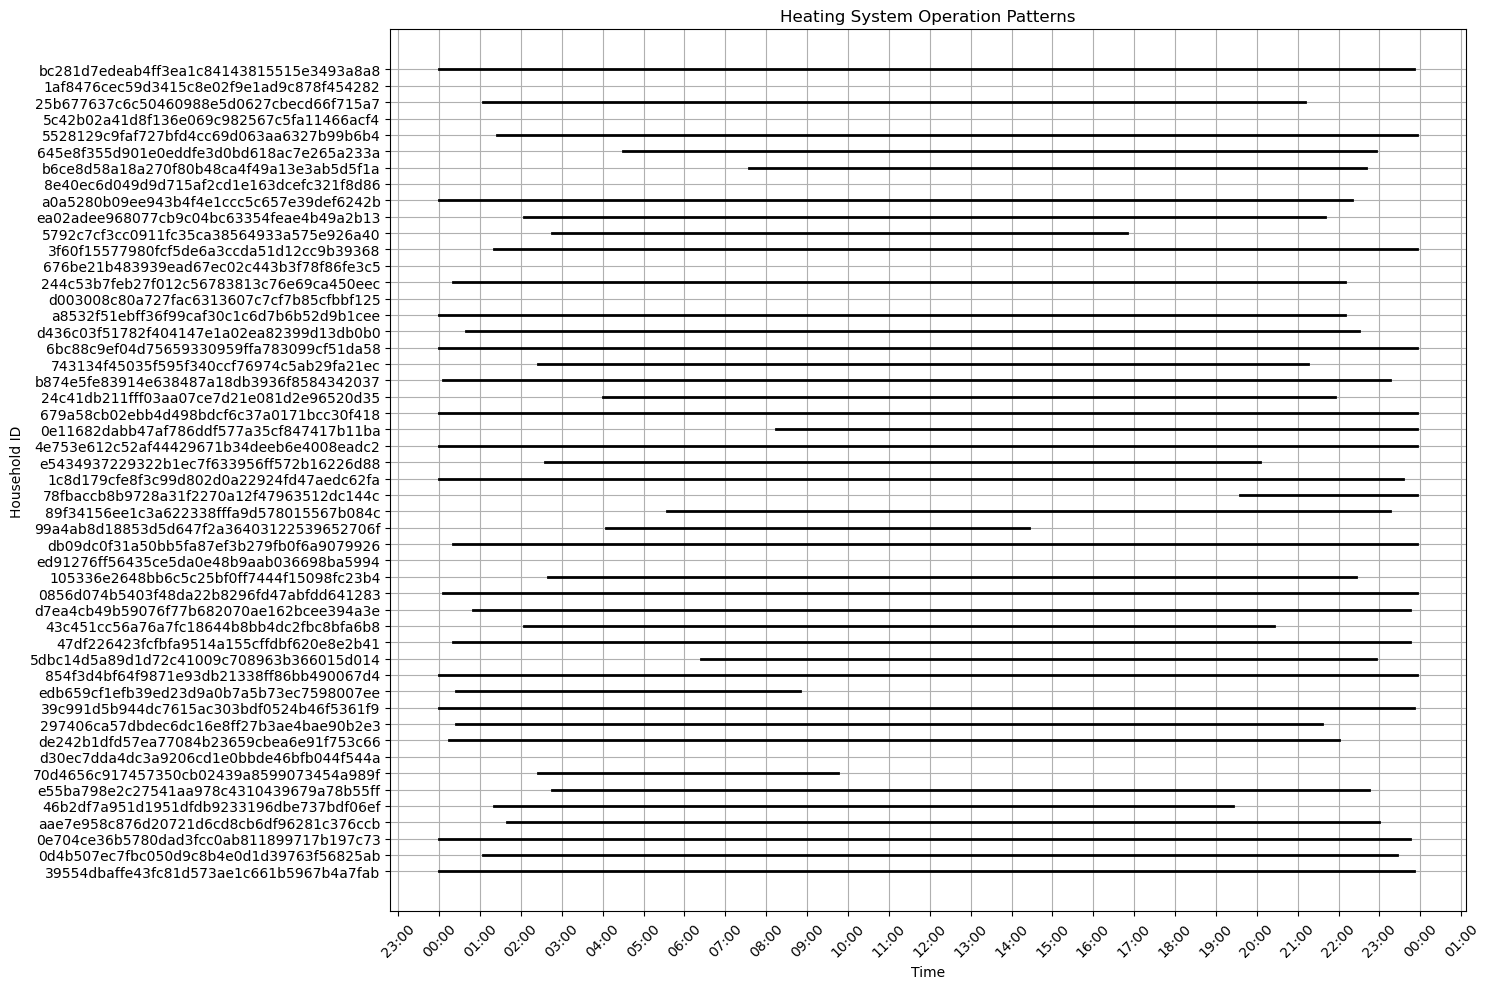

In [111]:
# Select 10 random households
np.random.seed(42)  # For reproducibility
random_households = np.random.choice(filtered_data['Identifier'].unique(), size=50, replace=False)

fig, ax = plt.subplots(figsize=(15, 10))

# Loop through each randomly selected household
for i, identifier in enumerate(random_households):
    # Extract data for this household
    household_data = filtered_data[filtered_data['Identifier'] == identifier]
    
    # Plotting the activity
    times = pd.to_datetime(household_data['DateTime'])
    household_data['TotalHeating'] = household_data[['auxHeat1', 'auxHeat2', 'auxHeat3', 'compHeat1', 'compHeat2']].max(axis=1)
    heating_activity = household_data['TotalHeating']
    
    # We plot only the intervals with activity (heating_activity > 0)
    active_periods = heating_activity > 0
    ax.plot(times[active_periods], np.full(sum(active_periods), i), 'k-', lw=2)  # 'k-' for black solid line

# Formatting the plot
ax.set_yticks(np.arange(len(random_households)))
ax.set_yticklabels(random_households)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Hour ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:Minute format
ax.set_xlabel('Time')
ax.set_ylabel('Household ID')
ax.set_title('Heating System Operation Patterns')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

C:\Users\alisj\AppData\Local\Temp\ipykernel_17248\1271791649.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_data['TotalHeating'] = household_data[['auxHeat1', 'auxHeat2', 'auxHeat3', 'compHeat1', 'compHeat2']].max(axis=1)
C:\Users\alisj\AppData\Local\Temp\ipykernel_17248\1271791649.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_data['TotalHeating'] = household_data[['auxHeat1', 'auxHeat2', 'auxHeat3', 'compHeat1', 'compHeat2']].max(axis=1)
C:\Users\alisj\AppData\Local\Temp\ip

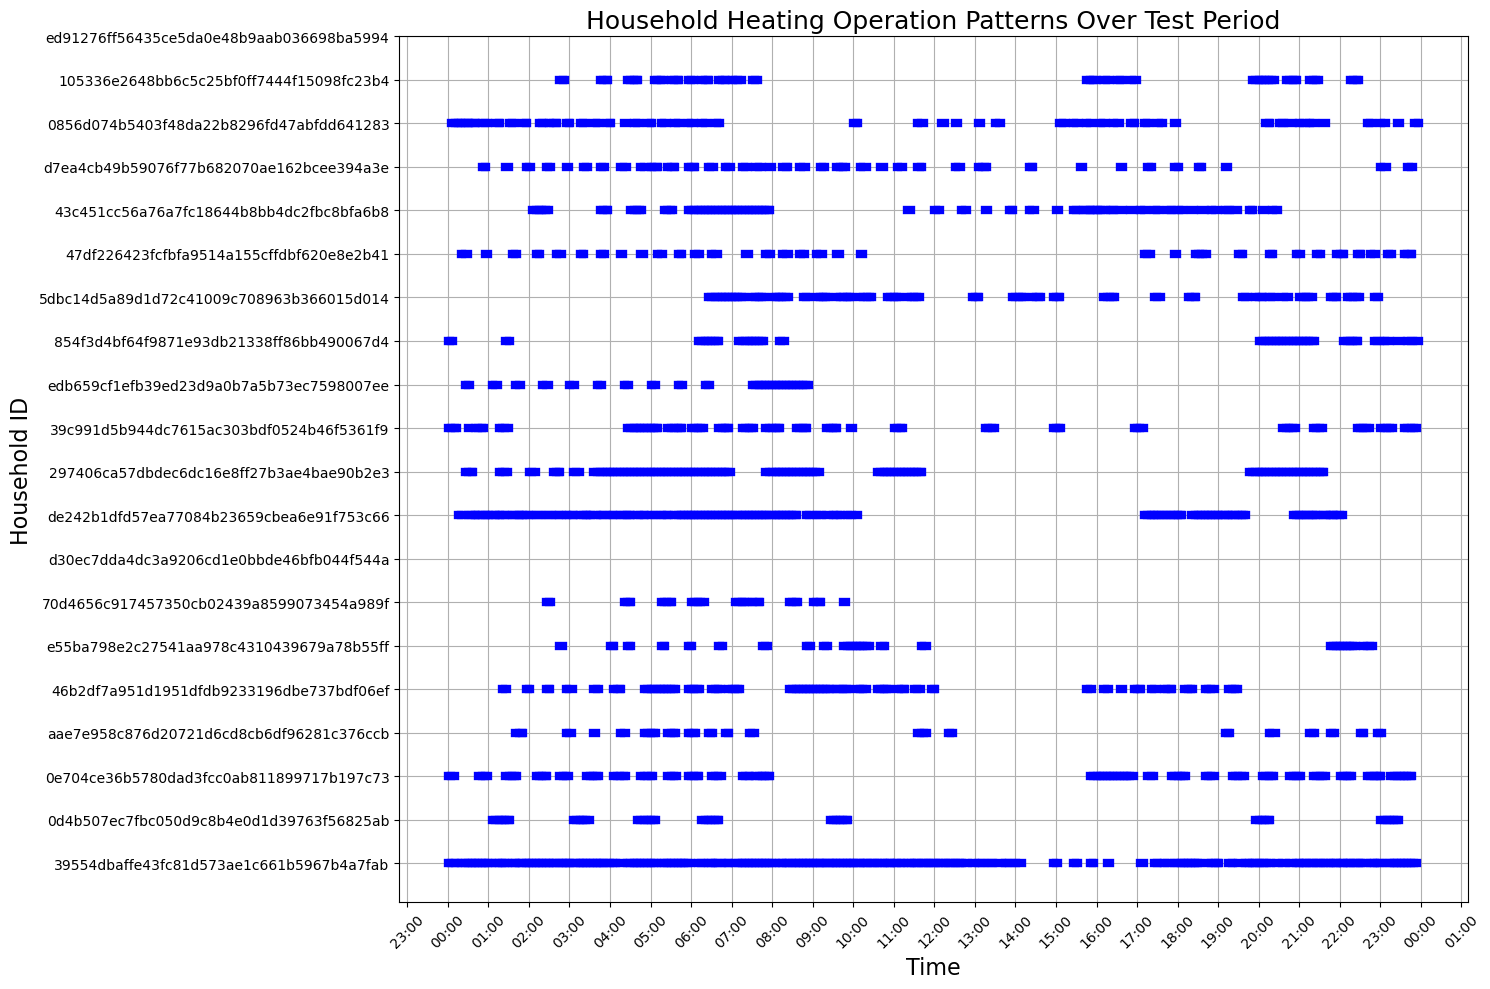

In [112]:
# Plot time patters for random households

# Select 10 random households
np.random.seed(42)  # For reproducibility
random_households = np.random.choice(filtered_data['Identifier'].unique(), size=20, replace=False)

fig, ax = plt.subplots(figsize=(15, 10))

# Loop through each randomly selected household
for i, identifier in enumerate(random_households):
    # Extract data for this household
    household_data = filtered_data[filtered_data['Identifier'] == identifier]
    
    # Plotting the activity
    times = pd.to_datetime(household_data['DateTime'])
    household_data['TotalHeating'] = household_data[['auxHeat1', 'auxHeat2', 'auxHeat3', 'compHeat1', 'compHeat2']].max(axis=1)
    heating_activity = household_data['TotalHeating']
    
    # Plot each interval of activity
    for j in range(len(heating_activity)):
        if heating_activity.iloc[j] > 0:  # Only plot if there is activity
            # Calculate the fraction of the 5-minute interval that was active
            start_time = times.iloc[j]
            duration_seconds = heating_activity.iloc[j]
            end_time = start_time + pd.Timedelta(seconds=min(duration_seconds, 300))
            ax.plot([start_time, end_time], [i, i], 'b-', lw=6)  # Plot as a line segment

# Formatting the plot
ax.set_yticks(np.arange(len(random_households)))
ax.set_yticklabels(random_households)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Hour ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:Minute format
ax.set_xlabel('Time',fontsize=16)
ax.set_ylabel('Household ID',fontsize=16)
ax.set_title('Household Heating Operation Patterns Over Test Period',fontsize=18)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
fig.savefig('C:/Users/alisj/Downloads/time_patterns_plot.jpg', dpi=300)

plt.show()